# Ejercicio 1

Considerar un dado de 20 caras para calcular las siguientes probabilidades
- p(obtener un número entre 6 y 9)
- p(obtener al menos 12)
- p(obtener 3 o menos)

Graficar la función de densidad de probabilidad


In [9]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt


Dado de 20 caras

In [2]:
# Máximo es 20 
dado = stats.randint(low = 1, high = 21)
dado 

p(obtener un número entre 6 y 9)

In [3]:
dado.pmf([6, 7, 8, 9]).sum() 

0.2

p(obtener al menos 12)

In [10]:
1 - dado.cdf(11) 
# CDF te da la probabilidad de ese número o menos (en este caso, de 1 a 11)

0.44999999999999996

p(obtener 3 o menos)

In [9]:
dado.cdf(3)

0.15

Función de densidad de probabilidad

(0.0, 1.0)

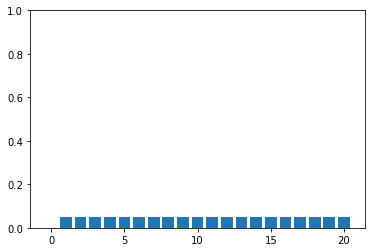

In [12]:
plt.bar(range(0,21), dado.pmf(range(0,21)))
plt.ylim([0,1])

# Ejercicio 2

El apagador de una casa funciona 1 de 5 veces y al accionarlo 15 veces calcular la probabilidad de:
- P(Funcione 9 veces)
- P(Funcione menos de 4 veces)
- P(Funcione 3 o más veces)

Graficar la Función de Densidad de Probabilidad


p(funcione 9 veces)

In [3]:
fun = 1/5
num = 15
# Se trata de una distribución binomial

apagador = stats.binom(num, fun)
apagador

In [5]:
apagador.pmf(9)

0.0006717597286400011

p(menos de 4)

In [6]:
apagador.cdf(3)

0.6481621045739516

p(3 o + veces)

In [7]:
1-apagador.cdf(2)

0.6019767907450877

Función de densidad de probabilidad

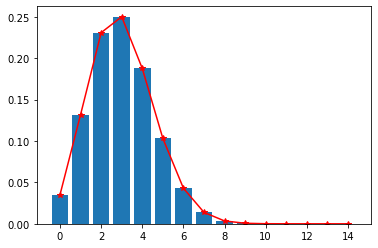

In [13]:
plt.bar(range(0,15), apagador.pmf(range(0,15))) 
plt.plot(range(0,15), apagador.pmf(range(0,15)), color='r', marker='*')

# Ejercicio 3

En una línea de producción se estrellan 3 vitrales por hora, clacular las probabilidades de:
- P(Estrellar un vitral por hora)
- P(Estrellar entre 4 y 7 por hora)
- P(Estrellar menos de 6 por hora)

Graficar la Función de Densidad de Probabilidad


In [38]:
# Distribución de Poisson
vitrales = stats.poisson(3)

p(1 x hr)

In [16]:
vitrales.pmf(1)

0.14936120510359185

p(4-7 x hr)

In [17]:
vitrales.cdf(7) - vitrales.cdf(3)

0.3408636073614113

p(<6 x hr)

In [18]:
vitrales.cdf(5)

0.9160820579686966

Función de densidad de probabilidad

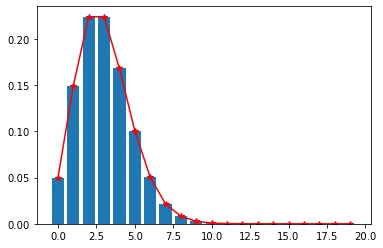

In [19]:
plt.bar(range(0,20), vitrales.pmf(range(0,20))) 
plt.plot(range(0,20), vitrales.pmf(range(0,20)), color='r', marker='*')

# Ejercicio 4

El documento sqft.csv, contiene el área en pies cuadrados (sqft) de un conjunto de hogares, con esta información calcular:
- P(Una casa posea 830 +/- 25 sqft)
- P(Una casa posea más de 3000 sqft)
- P(Una casa posea menos de 275 sqft)

Graficar la Función de Densidad de Probabilidad


In [40]:
df = pd.read_csv('./Files actividades/sqft.csv')
df.describe()

,sqft
count,100000.000000
mean,1549.911993
std,299.476520
min,141.069308
25%,1347.946300
50%,1549.542945
75%,1752.745570
max,2941.143841


Ajustando a una normal

In [44]:
size_h = stats.norm(loc = df['sqft'].mean(), scale = df['sqft'].std())

p(805 < x < 855)

In [46]:
df[(df['sqft'] > 805) & (df['sqft'] < 855)].count()/len(df)*100

sqft    0.373
dtype: float64

In [48]:
(1 - size_h.cdf(805) - (1- size_h.cdf(855)))*100

0.3724634297977536

p(x > 3000)

In [37]:
df[df['sqft'] > 3000].count() / len(df)*100

sqft    0.0
dtype: float64

In [50]:
(1-size_h.cdf(3000))*100

6.424486836964505e-05

p( x < 275)

In [36]:
df[df['sqft'] < 275].count() / len(df)*100

sqft    0.002
dtype: float64

In [52]:
size_h.cdf(275)*100

0.0010353163808029693

Función de densidad de probabilidad: Usas PDF porque es continua; si fuese discreta, usarías PMF

array([[<AxesSubplot:title={'center':'sqft'}>]], dtype=object)

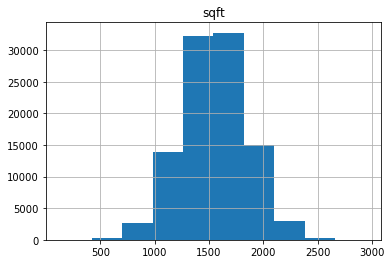

In [65]:
df.hist()

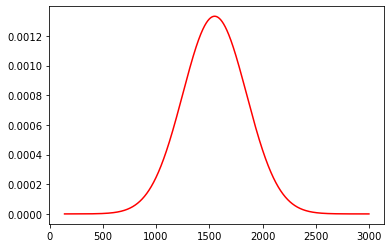

In [64]:
plt.plot(range(140,3000), size_h.pdf(range(140,3000)), color='r')

# Ejercicio 5

Un mecanógrafo comete una media de 2 errores por página ¿Cuál es la probabilidad de que una página concreta no tenga errores?
- Pista: Se trata de la tasa de errores por página.

In [67]:
pag = stats.poisson(2)
pag.pmf(0)

0.1353352832366127

Los componentes se embalan en cajas de 20. La probabilidad de que un componente individual sea defectuoso es del 10%. Calcula las siguientes probabilidades:
- Que una caja contenga exactamente 2 componentes defectuosos

Pista: 20 componentes independientes con un estado binario: normal o defectuoso.


In [68]:
caja = stats.binom(20, 0.1)
caja.pmf(2)

0.28517980706429846

- Qué una caja contenga máximo 2 componentes defectuosos

Pista: Encuentra todas las posibilidades de que haya al menos 2 componentes defectuosos.


In [69]:
caja.cdf(2)

0.6769268051894659

In [70]:
caja.pmf(0)+caja.pmf(1)+caja.pmf(2)

0.6769268051894661

Los clientes llegan a un bar local a un ritmo de 30 por hora. ¿Cuál es la probabilidad de que el portero pueda tomarse un descanso de tres minutos para ir al baño sin perder al siguiente cliente?
- Pista 1: Reducir la tasa de persona/hora a persona/minuto
- Pista 2: La probabilidad del tiempo antes de que ocurra el evento sigue una distribución exponencial.

In [77]:
stats.expon.cdf(3, scale = 30/60) #Lo escalas de horas a minutos


0.9975212478233336

# Ejercicio 6

Tienes que encontrar a una persona alta, de al menos 1,80 metros, para que te ayude a alcanzar un tarro de galletas. El 8% de la población mide 1,80 m o más, y la gente pasa de media dos veces por minuto. Si esperas en la acera, ¿cuál es la probabilidad de que tengas que esperar más de diez minutos para conseguir unas galletas?
- Pista 1: Halla la tasa de número de personas altas/minuto.
- Pista 2: El problema se reduce a una función de distribución exponencial.



In [89]:
(1-stats.expon.cdf(10, scale = 2) )*0.08 
#Distribución exponencial, pasando 2 veces por minuto
#Aterrizado a minutos
#Agregando la probabilidad de la estatura

0.000539035759926838

Un pasajero apresurado llegará varios minutos tarde a un vuelo programado para las 10 de la mañana a Nueva York. Sin embargo, es posible que llegue al vuelo, ya que el embarque siempre se permite hasta las 10:10 A.M., y a veces se permite el embarque hasta las 10:30 AM. Suponiendo que la hora de finalización del intervalo de embarque se distribuye uniformemente sobre los límites anteriores, encuentre la probabilidad de que el pasajero llegue a su vuelo, suponiendo que llega a la puerta de embarque a las 10:25.

In [90]:
vuelo = stats.randint(low=10, high=30) #Son los minutos donde no tiene certidumbre de si podrá subir o no

In [91]:
vuelo.pmf(25)

0.05

# Ejercicio 7

Tu gato empieza a pedir la cena a las 3:30 todos los días, y sospechas que maúlla a un ritmo fijo. Has observado que aproximadamente una quinta parte de las veces tu gato no maúlla hasta las 3:40, lo que te da 10 minutos inesperados de tranquilidad. ¿Cuál es la probabilidad de que tu gato te deje tranquilo durante 30 minutos?
- Pista : Primero encuentra el parámetro de la distribución, y luego utiliza el parámetro que has encontrado para calcular la probabilidad desconocida.


In [92]:
gato = stats.poisson(1/5)

In [93]:
gato.pmf(3)

0.0010916410041039767

De alguna manera, has acabado con dos tipos de tenedores. Están los tenedores buenos, que son grandes y sirven para un bocado sano, pero también están estos pequeños y finos que no entiendes muy bien para qué sirven, probablemente deberías deshacerte de ellos. Necesitas dos tenedores para ti y tu pareja, y coge un puñado de 5. Si hay 14 tenedores en el cajón, de los cuales la mitad son del tipo bueno, ¿cuál es la probabilidad de que tengas al menos los dos tenedores buenos que necesitas?
- Pista 1: Este es un problema de distribución hipergeométrica.
- Pista 2: Descomponga todas las posibilidades de tener al menos dos tenedores buenos, es decir, 2 tenedores buenos, 3, 4 y 5.


In [96]:
tenedores = stats.nhypergeom(M = 14, n = 7, r = 5)

In [108]:
tenedores.pmf(2) + tenedores.pmf(3) + tenedores.pmf(4) + tenedores.pmf(5)

0.6689976689976695

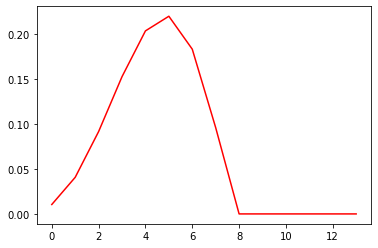

In [116]:
plt.plot(range(0,14), tenedores.pmf(range(0,14)), color='r')

# Ejercicio 8

De los alumnos de una clase, el 60% son genios, el 70% aman el chocolate y el 40% entran en ambas categorías. Determina la probabilidad de que un alumno seleccionado al azar no sea ni un genio ni un amante del chocolate.
- Pista: Es de tipo conjunto


In [7]:
print('Porcentaje  de la población que no ama el chocolate ni es genio', round(1-(0.6-0.4)-(0.7-0.4)-0.4, 2))
prob_NG_given_NC = 0.1 / 0.3
print('Probabilidad de no ser genio dado que no ama el chocolate', round(prob_NG_given_NC,2))
prob_NC_given_NG = 0.1 / 0.4
print('Probabilidad de no amar el chocolate dado que no es genio:', round(prob_NC_given_NG,2))



Porcentaje  de la población que no ama el chocolate ni es genio 0.1
Probabilidad de no ser genio dado que no ama el chocolate 0.33
Probabilidad de no amar el chocolate dado que no es genio: 0.25


Se lanza tres veces, de forma independiente, un dado justo de 6 caras. ¿Qué es más probable: una suma de 11 o una suma de 12?



In [27]:
suma11 = []
suma12 = []

for i in range(1,7):
    for j in range(1,7):
        for k in range(1,7):
            suma = i+j+k
            if suma == 11:
                suma11.append(suma)
            elif suma == 12:
                suma12.append(suma)

total_combinaciones = 6**3 # (6 por 6 por 6)
prob11 = np.round(len(suma11)/total_combinaciones,3)
print('Probabilidad de sumar 11: ',prob11)
prob12 = np.round(len(suma12)/total_combinaciones,3)
print('Probabilidad de sumar 12: ',prob12)

Probabilidad de sumar 11:  0.125
Probabilidad de sumar 12:  0.116


In [13]:
print('Es más probable que la suma sea 11')

Es más probable que la suma sea 11


Hay que repartir 90 alumnos al azar en 3 clases de igual tamaño. Joe y Jane son dos de los estudiantes. ¿Cuál es la probabilidad de que acaben en la misma clase?


In [14]:
alumnos = 90
grupos = 3

alumnos_por_grupo = alumnos/grupos
amigos = 2

In [15]:
from math import factorial

In [26]:
#Combinaciones de alumnos repartidos entre grupos
combinaciones = factorial(alumnos) / (factorial(alumnos-alumnos_por_grupo)*factorial(alumnos_por_grupo)) 
#Combinaciones donde se logra que ambos estén en el mismo grupo 
#(es decir, esos dos ya no forman parte de las combinaciones, sino que están dados)
juntos = factorial((alumnos-amigos))/(factorial((alumnos-amigos)-(alumnos_por_grupo-amigos))*factorial(alumnos_por_grupo-amigos))

#La probabilidad de que toquen juntos sería 3 veces (por el número de grupos) el número de combinaciones donde ellos dos están dados entre el total de combinaciones
print('Probabilidad de que ambos toquen en el mismo grupo: ', {np.round(3*juntos/combinaciones, 10)})

Probabilidad de que ambos toquen en el mismo grupo:  {0.3258426966}


C:\Users\ncordova\AppData\Local\Temp\ipykernel_9996\3009526610.py:2: DeprecationWarning: Using factorial() with floats is deprecated
  combinaciones = factorial(alumnos) / (factorial(alumnos-alumnos_por_grupo)*factorial(alumnos_por_grupo))
C:\Users\ncordova\AppData\Local\Temp\ipykernel_9996\3009526610.py:5: DeprecationWarning: Using factorial() with floats is deprecated
  juntos = factorial((alumnos-amigos))/(factorial((alumnos-amigos)-(alumnos_por_grupo-amigos))*factorial(alumnos_por_grupo-amigos))


Se reparte una baraja de 52 cartas a 4 jugadores. Encuentra la probabilidad de que cada uno de los jugadores obtenga un as.
- Pista: Los últimos tres son de tipo combinatoria

In [30]:
cartas = 52
jugadores = 4
CxJ = cartas / jugadores
As = 1

In [33]:
#Combinaciones de cartas percibidas por los jugadores
combinaciones = factorial(cartas) / (factorial(cartas-jugadores)*(factorial(jugadores)))
#Combinaciones de cartas de cada jugador en las que se tiene un as
As_dado = factorial(CxJ) / (factorial(CxJ-As)*factorial(As))

print('Probabilidad de que a cada uno le toque un As: ', {np.round(As_dado**jugadores/combinaciones, 3)})

Probabilidad de que a cada uno le toque un As:  {0.105}


C:\Users\ncordova\AppData\Local\Temp\ipykernel_9996\2697208229.py:4: DeprecationWarning: Using factorial() with floats is deprecated
  As_dado = factorial(CxJ) / (factorial(CxJ-As)*factorial(As))
